<a href="https://colab.research.google.com/github/CA683-Group99/Wind-Energy-Prediction/blob/main/4_IslandElectricityRandomForestModel_transformedTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RESULTS PER OPTION:

- Original 4_IslandElectricityRandomForestModel:

      'hour', 'isweekday', 'month', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL',
       'wdsp', 'wddir', 'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB',
       'temp_DUB', 'TotalWindCapacityMW'],


MAE: 272.26593735961364
RMSE: 360.6494999475853
Train r2_score: 0.8544186552101587

- radianTime instead of Month and Hour X_train.columns:
      'isweekday', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL', 'wdsp', 'wddir',
      'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
      'radianTime', 'Day_inYear', 'TotalWindCapacityMW'

MAE: 292.7106431098383
RMSE: 381.47832078345976
Test r2_score: 0.8371173664337087

- With Day_inYear and hour:
      ['hour', 'isweekday', 'wdsp_BEL', 'wddir_BEL', 'temp_BEL', 'wdsp',
       'wddir', 'wdsp_COR', 'wddir_COR', 'wdsp_DUB', 'wddir_DUB', 'temp_DUB',
       'Day_inYear', 'TotalWindCapacityMW']
MAE: 272.65383788185085
RMSE: 358.0680549323199
Test r2_score: 0.8564952711814031


- Wind transformed option: 
      'hour', 'isweekday', 'wind_BELsin', 'wind_BELcos', 'temp_BEL',
       'windsin', 'windcos', 'wind_CORsin', 'wind_CORcos', 'wind_DUBsin',
       'wind_DUBcos', 'temp_DUB', 'Day_inYear', 'TotalWindCapacityMW'],
MAE: 312.04923489442945
RMSE: 403.4146893784036
Test r2_score: 0.8178461000557369

In [157]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

import io
import requests


from plotly.offline import iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from datetime import tzinfo, timedelta, datetime, date

# Any results you write to the current directory are saved as output.

import plotly.express as px
import seaborn as sns

In [158]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


# Load feature vector


In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
import os
os.chdir('/content/drive/MyDrive/CA683Project')


In [161]:
fileP = 'IslandElectricity2017_2020v4.csv'
newdf = pd.read_csv(fileP, parse_dates=[1], na_values=" ")

latestWindCapacityMW = newdf['TotalWindCapacityMW'].max()

In [162]:
#Krystian: Looking for maximal extreme values
print('-----------DATA SIZE -------------')
print(newdf.shape)           # 10 Columns, 35044 rows
count_row = newdf.shape[0]   # 10 Columns
count_col = newdf.shape[1]   # 35044 rows
print('Rows: ', count_row, ', Columns: ', count_col)

print('-----------DATA INFO -------------')
print(newdf.info())

print('-----------DATA MAX Values -------------')
newdf.max()

print('-----------DATA COLUMNS-------------')
columns = newdf.columns.values.tolist()
print (columns)

print('-----------BASIC STATISTICS-------------')
newdf.describe()

-----------DATA SIZE -------------
(32136, 94)
Rows:  32136 , Columns:  94
-----------DATA INFO -------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32136 entries, 0 to 32135
Data columns (total 94 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           32136 non-null  int64         
 1   date                 32136 non-null  datetime64[ns]
 2   ind_BEL              32136 non-null  int64         
 3   rain_BEL             32136 non-null  float64       
 4   ind.1_BEL            32136 non-null  int64         
 5   temp_BEL             32136 non-null  float64       
 6   ind.2_BEL            32136 non-null  int64         
 7   wetb_BEL             32136 non-null  float64       
 8   dewpt_BEL            32136 non-null  float64       
 9   vappr_BEL            32136 non-null  float64       
 10  rhum_BEL             32136 non-null  int64         
 11  msl_BEL              32136 non-null

Unnamed: 0  ind_BEL  ...          year  TotalWindCapacityMW
count  32136.000000  32136.0  ...  32136.000000         32136.000000
mean   16067.500000      0.0  ...   2018.814040          5009.629385
std     9277.008462      0.0  ...      1.112341           446.423214
min        0.000000      0.0  ...   2017.000000          4096.494000
25%     8033.750000      0.0  ...   2018.000000          4608.520000
50%    16067.500000      0.0  ...   2019.000000          5006.080000
75%    24101.250000      0.0  ...   2020.000000          5497.495000
max    32135.000000      0.0  ...   2021.000000          5531.095000

[8 rows x 92 columns]

In [163]:
import plotly.express as px

fig = px.scatter(newdf, x='date', y='ActualDemandMW')
fig.show()

In [164]:
eirgridCols = ['ActualDemandMW', 'ActualGenerationMW' , 'ForecastWndMW' , 'ActualWindMW', 'NetTotal_MW' ]
len(eirgridCols)

5

In [165]:
newdf = newdf.loc[newdf['month'].isnull() == False]

In [166]:
newdf['WindGenPercent'] = (newdf['ActualWindMW'] / newdf['ActualGenerationMW']) * 100
fig = px.scatter(newdf, x='hour', y='WindGenPercent', facet_col='year')
fig.show()

## Transform wind speed and dir

In [167]:
newdf.date

0       2017-07-01 00:00:00
1       2017-07-01 01:00:00
2       2017-07-01 02:00:00
3       2017-07-01 03:00:00
4       2017-07-01 04:00:00
                ...        
32131   2021-02-28 19:00:00
32132   2021-02-28 20:00:00
32133   2021-02-28 21:00:00
32134   2021-02-28 22:00:00
32135   2021-02-28 23:00:00
Name: date, Length: 32136, dtype: datetime64[ns]

In [168]:
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))

recentdf = newdf[newdf.date > "2021-02-24"]
fig.add_trace(go.Scatter(x=recentdf['date'], y=recentdf.wdsp,
                    mode='lines',
                    name='Wind Speed (kn)',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=recentdf['date'], y=recentdf.wddir,
                    mode='lines',
                    name='Wind dir (degree)',showlegend=True), 1, 1, secondary_y=True)

fig.show()

In [169]:
suffixes = ['_COR', '_DUB', '_BEL', '']
def transformWindInto2d(df):
  for suf in suffixes:
    df['wind' + suf + 'sin'] = None
    df['wind' + suf + 'cos'] = None

  def transformWindInto2dRow(row):
    for suf in suffixes:
      row['wind' + suf + 'sin'] = row['wdsp'+ suf] * math.sin(row['wddir' + suf])
      row['wind' + suf + 'cos'] = row['wdsp'+ suf] * math.cos(row['wddir' + suf])
    return row

  df = df.apply(transformWindInto2dRow, axis='columns')
  return df


In [170]:
newdf = transformWindInto2d(newdf)

In [171]:
newdf.columns

Index(['Unnamed: 0', 'date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL',
       'ind.2_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL',
       ...
       'TotalWindCapacityMW', 'WindGenPercent', 'wind_CORsin', 'wind_CORcos',
       'wind_DUBsin', 'wind_DUBcos', 'wind_BELsin', 'wind_BELcos', 'windsin',
       'windcos'],
      dtype='object', length=103)

In [172]:
newdf[['wind_CORsin', 'wind_CORcos']].describe()

wind_CORsin   wind_CORcos
count  32136.000000  32136.000000
mean      -0.794188     -0.857943
std        7.716163      8.010704
min      -33.991699    -41.952060
25%       -5.823168     -6.304172
50%       -1.712622     -0.265159
75%        4.552175      4.499431
max       34.308388     32.870811

In [173]:

recentdf = newdf[newdf.date > "2021-02-24"]

fig = px.scatter(x=newdf['windsin'], y=newdf.windcos)
#fig = px.scatter(x=recentdf['windsin'], y=recentdf.windcos)
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

## Transform time into 2D

Intend to capture the seasonal pattern

In [174]:
import numpy as np

def transformTimeInto2d(df):
  df['Day_inYear'] = None
  df['daysInYear'] = None
  df['radianTime'] = None

  def check_leap(year):
    if year%4 == 0:
      return 366
    else:
      return 365

  def transformTimeInto2dRow(row):
    row['Day_inYear'] = row['date'].timetuple().tm_yday
    daysInYear = check_leap(row['year'])
    row['daysInYear'] = daysInYear
    row['radianTime'] = (row.hour + row.Day_inYear * 24 ) / (24 * daysInYear) * (2*np.pi)
    return row

  df = df.apply(transformTimeInto2dRow, axis='columns')
  return df

In [175]:
newdf = transformTimeInto2d(newdf)

In [176]:
fig = px.scatter(newdf, x='radianTime', y='ActualDemandMW', color='year')
fig.show()

In [177]:
fig = px.scatter(newdf, x='radianTime', y='temp', color='year', hover_data=['month'])
fig.show()

# Prep smaller dataset to run model : reduced dataset for prototype to known important factors

In [178]:
newdf.columns[0:50]

Index(['Unnamed: 0', 'date', 'ind_BEL', 'rain_BEL', 'ind.1_BEL', 'temp_BEL',
       'ind.2_BEL', 'wetb_BEL', 'dewpt_BEL', 'vappr_BEL', 'rhum_BEL',
       'msl_BEL', 'ind.3_BEL', 'wdsp_BEL', 'ind.4_BEL', 'wddir_BEL', 'ww_BEL',
       'w_BEL', 'sun_BEL', 'vis_BEL', 'clht_BEL', 'clamt_BEL', 'ind_DUB',
       'rain_DUB', 'ind.1_DUB', 'temp_DUB', 'ind.2_DUB', 'wetb_DUB',
       'dewpt_DUB', 'vappr_DUB', 'rhum_DUB', 'msl_DUB', 'ind.3_DUB',
       'wdsp_DUB', 'ind.4_DUB', 'wddir_DUB', 'ww_DUB', 'w_DUB', 'sun_DUB',
       'vis_DUB', 'clht_DUB', 'clamt_DUB', 'ind', 'rain', 'ind.1', 'temp',
       'ind.2', 'wetb', 'dewpt', 'vappr'],
      dtype='object')

In [179]:
newdf.columns[50:120]

Index(['rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt', 'ind_COR', 'rain_COR', 'ind.1_COR', 'temp_COR',
       'ind.2_COR', 'wetb_COR', 'dewpt_COR', 'vappr_COR', 'rhum_COR',
       'msl_COR', 'ind.3_COR', 'wdsp_COR', 'ind.4_COR', 'wddir_COR', 'ww_COR',
       'w_COR', 'sun_COR', 'vis_COR', 'clht_COR', 'clamt_COR', 'Unnamed: 0.1',
       'ActualDemandMW', 'ForecastWndMW', 'ActualWindMW', 'ActualGenerationMW',
       'NetTotal_MW', 'WindMWPercent', 'hour', 'isweekday', 'month', 'year',
       'TotalWindCapacityMW', 'WindGenPercent', 'wind_CORsin', 'wind_CORcos',
       'wind_DUBsin', 'wind_DUBcos', 'wind_BELsin', 'wind_BELcos', 'windsin',
       'windcos', 'Day_inYear', 'daysInYear', 'radianTime'],
      dtype='object')

In [180]:
redds = newdf.loc[:, ['date', 'hour', 'isweekday',
                      'wind_BELsin', 'wind_BELcos', 'temp_BEL',
                      'windsin', 'windcos','temp',
                      'wind_CORsin', 'wind_CORcos', 'temp_COR',
                      'wind_DUBsin', 'wind_DUBcos', 'temp_DUB', 
                      'radianTime', 'Day_inYear',
                      'TotalWindCapacityMW', 'ActualWindMW', 'ForecastWndMW', 'ActualDemandMW']]

In [181]:
redds.isnull().sum()

date                   0
hour                   0
isweekday              0
wind_BELsin            0
wind_BELcos            0
temp_BEL               0
windsin                0
windcos                0
temp                   0
wind_CORsin            0
wind_CORcos            0
temp_COR               0
wind_DUBsin            1
wind_DUBcos            1
temp_DUB               0
radianTime             0
Day_inYear             0
TotalWindCapacityMW    0
ActualWindMW           0
ForecastWndMW          0
ActualDemandMW         0
dtype: int64

In [182]:
#redds = redds.loc[redds['date'] >= "2018-01-01 00:00:00", :]

In [183]:
redds.tail()

date  hour  ...  ForecastWndMW  ActualDemandMW
32131 2021-02-28 19:00:00  19.0  ...         602.50         5288.00
32132 2021-02-28 20:00:00  20.0  ...         719.00         4913.25
32133 2021-02-28 21:00:00  21.0  ...         782.75         4540.50
32134 2021-02-28 22:00:00  22.0  ...         776.75         4156.75
32135 2021-02-28 23:00:00  23.0  ...         776.00         3907.50

[5 rows x 21 columns]

In [184]:
# Backfill for the few missing points (up to 4 in a row )
redds.fillna(method='ffill', limit=4, inplace=True)
redds.isweekday = redds.isweekday.astype('bool')

## Correlation matrix and VIF


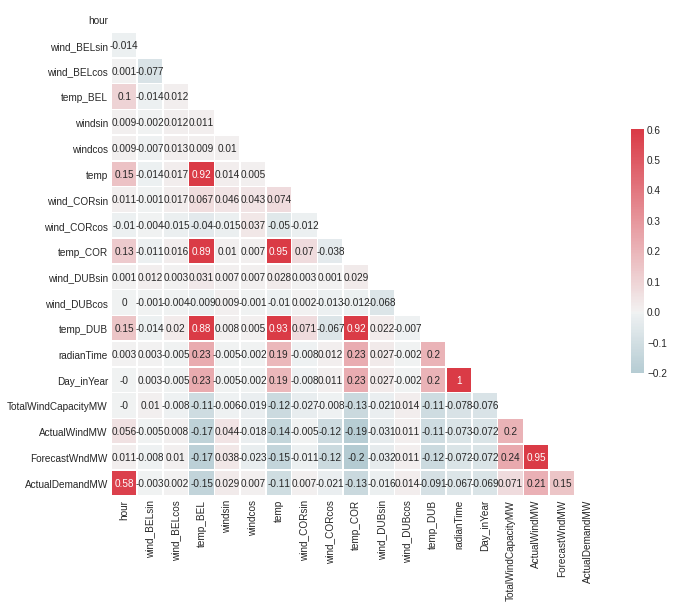

In [185]:
import seaborn as sns

num_df = redds.select_dtypes(['int', 'float'])
# Compute the correlation matrix
corr = num_df.corr()
corr = np.round(corr, 3)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.6, center=0, annot= True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [190]:
X = redds[['Day_inYear', 'hour',
                      'wind_BELsin', 'wind_BELcos', 'temp_BEL',
                      'windsin', 'windcos', 'temp',
                      'wind_CORsin', 'wind_CORcos',  'temp_COR',
                      'wind_DUBsin', 'wind_DUBcos',  'temp_DUB', 'TotalWindCapacityMW']]

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

#X = redds[['wdsp_BEL', 'wddir_BEL', 'temp_BEL', 'wdsp', 'wddir', 'temp','wdsp_COR', 'wddir_COR',  'temp_COR','wdsp_DUB', 'wddir_DUB',  'temp_DUB']]
X = add_constant(X)

vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])


[1.0827145861794, 1.0422474349824706, 1.0066599072427254, 1.0073177165763696, 6.9479537353640275, 1.0030106400978462, 1.0041652034804565, 15.742093280127696, 1.0105851769839498, 1.01136025309326, 11.505235839809515, 1.0066640451941538, 1.0051904317461333, 8.456734654820652, 1.0209011217970145]


In [192]:
pd.DataFrame(X.iloc[:, 1:].columns, vif[1:])

0
1.082715            Day_inYear
1.042247                  hour
1.006660           wind_BELsin
1.007318           wind_BELcos
6.947954              temp_BEL
1.003011               windsin
1.004165               windcos
15.742093                 temp
1.010585           wind_CORsin
1.011360           wind_CORcos
11.505236             temp_COR
1.006664           wind_DUBsin
1.005190           wind_DUBcos
8.456735              temp_DUB
1.020901   TotalWindCapacityMW

 ## Drop temp_COR, Temp and Hour as too correlated to Dublin temp


In [193]:
redds.drop(['temp_COR'], axis=1, inplace=True)
redds.drop(['temp'], axis=1, inplace=True)
redds.drop(['radianTime'], axis=1, inplace=True)

In [194]:
redds.columns

Index(['date', 'hour', 'isweekday', 'wind_BELsin', 'wind_BELcos', 'temp_BEL',
       'windsin', 'windcos', 'wind_CORsin', 'wind_CORcos', 'wind_DUBsin',
       'wind_DUBcos', 'temp_DUB', 'Day_inYear', 'TotalWindCapacityMW',
       'ActualWindMW', 'ForecastWndMW', 'ActualDemandMW'],
      dtype='object')

# Split data into Training (day of month between 1st and 21st) and Validation (day of the months above 22nd) sets and run Random Forest 

In [195]:
def setdayatt(row):
    row["day"] = row.date.day
    return row

redds["day"] = 0
redds = redds.apply(setdayatt, axis='columns')



In [196]:
from sklearn.model_selection import train_test_split

# Split train vs. Test for day of the month <> 23 to avoid overfitting
X_train_full = redds.loc[(redds.day > 0) & (redds.day < 23), :]
X_valid_full = redds.loc[(redds.day >= 23), :]

y_train = X_train_full.ActualWindMW
X_train_full.drop(['ActualWindMW', 'ActualDemandMW', 'ForecastWndMW', 'day'], axis=1, inplace=True)

y_valid = X_valid_full.ActualWindMW
X_valid_full.drop(['ActualWindMW', 'ActualDemandMW', 'ForecastWndMW', 'day'], axis=1, inplace=True)

# Break off validation set from training data
#X_train_full, X_valid_full, y_train, y_valid = train_test_split(redds, y, train_size=0.8, test_size=0.2,random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64', 'bool']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


In [197]:
y_train.shape , X_train.shape, y_valid.shape, X_valid.shape

((23232,), (23232, 14), (8904,), (8904, 14))

In [198]:
redds[['date', 'ActualWindMW']].tail(24*6 + 3)


date  ActualWindMW
31989 2021-02-22 21:00:00       3928.00
31990 2021-02-22 22:00:00       3669.25
31991 2021-02-22 23:00:00       3450.75
31992 2021-02-23 00:00:00       3288.00
31993 2021-02-23 01:00:00       3307.75
...                   ...           ...
32131 2021-02-28 19:00:00        571.75
32132 2021-02-28 20:00:00        809.75
32133 2021-02-28 21:00:00        976.75
32134 2021-02-28 22:00:00       1039.25
32135 2021-02-28 23:00:00       1034.00

[147 rows x 2 columns]

In [199]:
y_valid.tail(24*6 + 3)

31461    1765.50
31462    1618.00
31463    1525.00
31992    3288.00
31993    3307.75
          ...   
32131     571.75
32132     809.75
32133     976.75
32134    1039.25
32135    1034.00
Name: ActualWindMW, Length: 147, dtype: float64

In [200]:
X_train.columns

Index(['hour', 'isweekday', 'wind_BELsin', 'wind_BELcos', 'temp_BEL',
       'windsin', 'windcos', 'wind_CORsin', 'wind_CORcos', 'wind_DUBsin',
       'wind_DUBcos', 'temp_DUB', 'Day_inYear', 'TotalWindCapacityMW'],
      dtype='object')

## Run model with Performance metrics :  mean_absolute_error, mean_squared_error, r2_score

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error

In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=200, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])



In [202]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [203]:
# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))
#print('mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_valid, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_valid, preds))) 
print('Test r2_score:', r2_score(y_valid, preds))

MAE: 312.04923489442945
RMSE: 403.4146893784036
Test r2_score: 0.8178461000557369


In [204]:
validLen = y_valid.shape[0]
preds.shape[0], y_valid.shape[0]

(8904, 8904)

## Metrics for last week to compare

In [205]:
X_validPreds = X_valid.copy()
X_validPreds['preds'] = preds
X_validPreds['actual'] = y_valid

X_validPreds['date'] = X_valid_full['date']
X_validPreds['ForecastWndMW'] = redds['ForecastWndMW']

In [206]:
weekValidPred = X_validPreds[-6*24:]


In [207]:


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))


fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.actual,
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.preds,
                    mode='lines',
                    name='RF Pred',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=weekValidPred['date'], y=weekValidPred.ForecastWndMW,
                    mode='lines',
                    name='Eirgrid Pred',showlegend=True), 1, 1, secondary_y=False)
fig.show()

In [208]:
print('Eirgrid Wind Forecast Week MAE:', np.round(mean_absolute_error(weekValidPred.actual, weekValidPred.ForecastWndMW ),1))
print('Eirgrid Wind Forecast Week RMSE:', np.round(np.sqrt(mean_squared_error(weekValidPred.actual, weekValidPred.ForecastWndMW)), 1)) 
print('Eirgrid Wind Forecast Week Train r2_score:', r2_score(weekValidPred.actual, weekValidPred.ForecastWndMW))
print("---------------------")
print('RF Week MAE:', np.round(mean_absolute_error(weekValidPred.actual, weekValidPred.preds ), 1))
print('RF Week RMSE:', np.round(np.sqrt(mean_squared_error(weekValidPred.actual, weekValidPred.preds)), 1)) 
print('RF Week Train r2_score:', r2_score(weekValidPred.actual, weekValidPred.preds))

Eirgrid Wind Forecast Week MAE: 426.4
Eirgrid Wind Forecast Week RMSE: 637.8
Eirgrid Wind Forecast Week Train r2_score: 0.6985319926759079
---------------------
RF Week MAE: 328.1
RF Week RMSE: 390.4
RF Week Train r2_score: 0.8870422243102688


In [209]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Wind"))

fig.add_trace(go.Scatter(x=redds['date'], y=redds['ForecastWndMW'],
                    mode='lines',
                    name='Eirgrid Forecast Wnd',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=redds['date'], y=redds['ActualDemandMW'],
                    mode='lines',
                    name='Demand Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=redds['date'], y=redds['ActualWindMW'],
                    mode='lines',
                    name='Wind Actual',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=X_valid_full['date'], y=preds,
                    mode='lines',
                    name='Pred',showlegend=True), 1, 1, secondary_y=False)


fig.update_layout(
    title_text="Wind actual (blue) vs. Predictions (red) for days 22nd and above each month",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=4000,
    height=500
)
fig.show()

## Model features importance

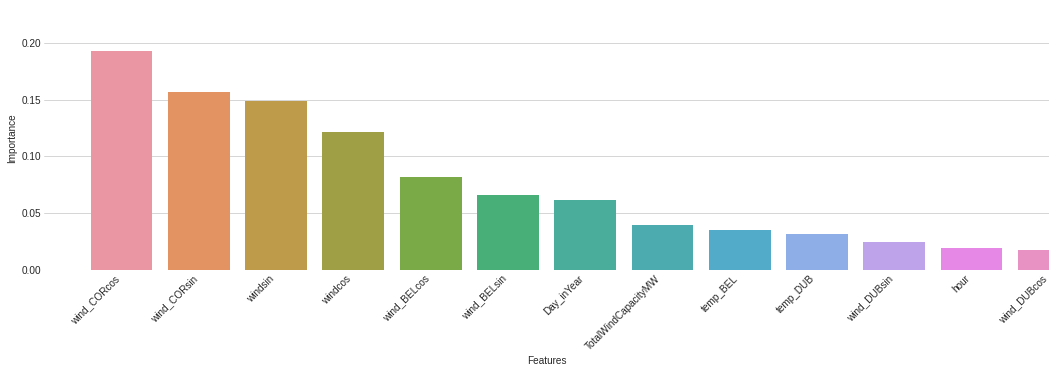

In [210]:
X_cols = X_valid.columns

rfc_fi = pd.DataFrame({'cols':X_cols, 'imp':model.feature_importances_}
                       ).sort_values('imp', ascending=False)

f, ax = plt.subplots(figsize=(18, 5))

chart = sns.barplot(x="cols", y="imp", data=(rfc_fi.loc[rfc_fi.imp > 0.015]))

# Add a legend and informative axis label
ax.set(xlim=(-1, 12), ylabel="Importance",
       xlabel="Features")
sns.despine(left=True, bottom=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)
plt.show()

# Met Éireann Weather Forecast API
Published by: Met Éireann
 32 
Licensed under: Met Eireann Custom Open Data Licence
https://data.gov.ie/dataset/met-eireann-weather-forecast-api/resource/027da6d5-d819-48d1-9b16-331dba169bd1

In [ ]:

from xml.dom.minidom import parse
import xml.dom.minidom


In [ ]:
def getWeather(lat, long, name):

    url = "http://metwdb-openaccess.ichec.ie/metno-wdb2ts/locationforecast?lat={};long={}".format(lat, long)
    s = requests.get(url).content

    DOMTree = xml.dom.minidom.parse(io.StringIO(s.decode('utf-8')))

    collection = DOMTree.documentElement
    if collection.hasAttribute("shelf"):
       print ("Root element : ", collection.getAttribute("shelf"))

    # Get all the movies in the collection
    product = collection.getElementsByTagName("product")

    df_cols = ['date', 'wddir', 'wdsp', 'temp']
    rows = []

    product = collection.getElementsByTagName("product")
    timefcs = collection.getElementsByTagName("time")


    # Print detail of each movie.
    for timefc in timefcs:
        if timefc.hasAttribute("from"):
            fromtime =""
            wdeg = None
            wsp = None
            temp = None

            #print ("from: ", timefc.getAttribute("from"))
            fromtime = timefc.getAttribute("from")

            location = timefc.getElementsByTagName('location')[0]

            if (len(location.getElementsByTagName('windDirection')) > 0 ):
                wd = location.getElementsByTagName('windDirection')[0]
                if wd.hasAttribute("deg"):
                    wdeg = float(wd.getAttribute("deg"))
                    #print ("Wi)nd Direction deg: ", wd.getAttribute("deg"))    

            if (len(location.getElementsByTagName('windSpeed')) > 0):
                wsp = location.getElementsByTagName('windSpeed')[0]
                if wsp.hasAttribute("mps"):
                    wsp = float(wsp.getAttribute("mps"))

            if (len(location.getElementsByTagName('temperature')) > 0):
                temp = location.getElementsByTagName('temperature')[0]
                if temp.hasAttribute("value"):
                    temp = float(temp.getAttribute("value"))
        #print ("From: " + fromtime + " Wind Direction deg: " + str(wdeg) + " Wind Speed mps: " + str(wsp))    
        if (wdeg != None):
            rows.append({"date": fromtime, "wddir": wdeg, "wdsp": wsp, "temp": temp})


    # <windDirection id="dd" deg="348.0" name="N"/>
    # <windSpeed id="ff" mps="3.2" beaufort="2" name="Svak vind"/>


    out_df = pd.DataFrame(rows, columns = df_cols)
    
    out_df["date"] = pd.to_datetime(out_df["date"], infer_datetime_format=True, errors='ignore')

    #out_df.to_csv(name + "weather.csv")

    return out_df

In [ ]:
# Belmullet: 54.225, -9.991
lat=54.225
long=-9.991

BELMULLETds = getWeather(lat, long, "Belmullet")

In [ ]:
# Cork Airport: 51.8382 Longitude: -8.4880
lat= 51.8382
long= -8.4880

corkairportds = getWeather(lat, long, "Cork")

In [ ]:
# Shannon Airport, Ireland. Latitude: 52.7012 Longitude: -8.9215.
lat= 52.7012
long= -8.9215

shannonairportds = getWeather(lat, long, "Shannon")

In [ ]:
# Dublin Airport in Ireland. Latitude: 53.4264 Longitude: -6.2499
lat= 53.4264
long= -6.2499

dublinairportds = getWeather(lat, long, "Dublin")

In [ ]:
left = BELMULLETds.set_index(['date']).copy()
right = dublinairportds.set_index(['date'])
#right.index = right.index.tz_convert(None)

wfds = left.join(right, lsuffix="_BEL", rsuffix="_DUB")

right = shannonairportds.set_index(['date'])
wfds = wfds.join(right, lsuffix="", rsuffix="_SHA")

right = corkairportds.set_index(['date'])
wfds = wfds.join(right, lsuffix="", rsuffix="_COR")
wfds = wfds.reset_index()


In [ ]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Met Station"))


fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_BEL'],
                    mode='lines',
                    name='Belmullet Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_COR'],
                    mode='lines',
                    name='Cork Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp'],
                    mode='lines',
                    name='Shannon Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)
fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_DUB'],
                    mode='lines',
                    name='Dublin Airport Wind Speed',showlegend=True), 1, 1, secondary_y=False)


fig.update_layout(
    title_text="Wind speed ",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=1400,
    height=500
)
fig.show()

In [ ]:
# Weather Hourly data wind speed in knt, for some reason, 1 knt = 0.514 m/s
knot = 0.514
wfds.wdsp_BEL = wfds.wdsp_BEL / knot
wfds.wdsp = wfds.wdsp / knot
wfds.wdsp_COR = wfds.wdsp_COR / knot
wfds.wdsp_DUB = wfds.wdsp_DUB / knot


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=newdf['wdsp_BEL'], name='BEL'))
fig.add_trace(go.Box(y=wfds['wdsp_BEL'], name='BEL forecast'))
fig.add_trace(go.Box(y=newdf['wdsp_DUB'], name = 'DUB'))
fig.add_trace(go.Box(y=wfds['wdsp_DUB'], name='DUB forecast'))
fig.add_trace(go.Box(y=newdf['wdsp'], name = 'SHA'))
fig.add_trace(go.Box(y=wfds['wdsp'], name='SHA forecast'))

fig.add_trace(go.Box(y=newdf['wdsp_COR'], name = 'CORK'))
fig.add_trace(go.Box(y=wfds['wdsp_COR'], name='CORK forecast'))
fig.show()

# Run predictions BROKEN

In [ ]:
wfds

In [ ]:
wfds["hour"] = 0
wfds["isweekday"] = False
wfds["month"] = 0
wfds['year'] = 0
wfds["day"] = 0
wfds['TotalWindCapacityMW'] = latestWindCapacityMW
def settimeattfull(row):
    row["hour"] = row.date.hour
    row["isweekday"] = (row.date.isoweekday() < 6) 
    row["month"] = row.date.month
    row["year"] = row.date.year
    row["day"] = row.date.day
    return row

wfds = wfds.apply(settimeattfull, axis='columns')

In [ ]:
wfds.columns

In [ ]:
OLDredtds = wfds.loc[:, ['hour', 'isweekday', 'month', 
                      'wdsp_BEL', 'wddir_BEL', 'temp_BEL',
                      'wdsp', 'wddir',
                      'wdsp_COR', 'wddir_COR',  
                      'wdsp_DUB', 'wddir_DUB',  'temp_DUB', 'TotalWindCapacityMW']]

In [ ]:
redtds = wfds.loc[:, ['hour', 'isweekday', 'month', 
                      'windsin_BEL', 'windcos_BEL', 'temp_BEL',
                      'windsin', 'windcos',
                      'windsin_COR', 'windcos_COR',  
                      'windsin_DUB', 'windcos_DUB',  'temp_DUB', 'TotalWindCapacityMW']]


In [ ]:
redtds.columns

In [ ]:
X_valid.columns

In [ ]:
redtds.info()

In [ ]:
X_valid.info()

In [ ]:

# Preprocessing of validation data, get predictions
preds = clf.predict(redtds)

In [ ]:
# Perform EDA, visualize, etc...
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=("Met Station"))


fig.add_trace(go.Scatter(x=wfds['date'], y=wfds['wdsp_BEL'],
                    mode='lines',
                    name='Belmullet Wind Speed',showlegend=True), 1, 1, secondary_y=False)

fig.add_trace(go.Scatter(x=wfds['date'], y=preds,
                    mode='lines',
                    name='Wind Preds',showlegend=True), 1, 1, secondary_y=True)

fig.update_layout(
    title_text="Wind speed ",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        l=100,
        r=20,
        t=110,
    ),
    plot_bgcolor='white',
    width=1400,
    height=500
)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

In [ ]:
preds

In [ ]:
forecast = wfds.copy()
#forecast['date'] = wfds['date']
forecast['RF_Preds']=preds

forecast.head(24)

In [ ]:
def getCurrentEirgridWindPrediction(): 
  url_base = 'http://smartgriddashboard.eirgrid.com/DashboardService.svc/csv?area=windActual&region=ALL&datefrom='
  url_mid = '%2000:00&dateto='
  url_end = '%2023:59'

  now = datetime.now()
  yesterday = now - timedelta(days=1)
  tomorrow = now + timedelta(days=1)

  date_time = yesterday.strftime("%d-%b-%Y")
  tom_date_time = tomorrow.strftime("%d-%b-%Y") 
  #print("Date and Time:",date_time)
  url = url_base + date_time + url_mid + tom_date_time + url_end
  print(url)

  s = requests.get(url).content
  mds = pd.read_csv(io.StringIO(s.decode('utf-8')), na_values='-')
  mds['date'] = pd.to_datetime(mds["DATE & TIME"], infer_datetime_format=True, errors='ignore')
  mds = mds.rename(columns={' FORECAST WIND(MW)' : 'ForecastWndMW'})
  mds = mds.rename(columns={' ACTUAL GENERATION(MW)' : 'ActualGenerationMW'})
  mds.drop('DATE & TIME', axis=1, inplace=True)
  mds.drop(' REGION', axis=1, inplace=True)

  return mds


In [ ]:
mds = getCurrentEirgridWindPrediction()
left = forecast.set_index(['date'])
right = mds.set_index(['date'])
forecast = left.join(right)

In [ ]:
forecast

In [ ]:
if not os.path.exists('forecast'):
  os.mkdir('forecast')

now = datetime.now()

forecast.to_csv("forecast/RF_forecast" + str(now) + ".csv")